<a href="https://colab.research.google.com/github/hamzabinashraf/AI-ML-internship-tasks/blob/main/Task_3_Predict_Future_Stock_Prices_(Short_Term)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**✅ Task 3: Predict Future Stock Prices (Short-Term) – Tesla Stock**

**📌 Objective:**

Use Tesla’s historical stock data to predict the next day's closing price using features like Open, High, Low, and Volume.


**🔧 Step 1: Install & Import Libraries**

In [ ]:
# Install yfinance if not already installed
!pip install yfinance --quiet

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

**📥 Step 2: Load Historical Stock Data – Tesla**

In [8]:
# Download Tesla stock data from Yahoo Finance
data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')

# Display the first few rows
data.head()

/tmp/ipython-input-8-925430205.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


**📊 Step 3: Prepare Dataset for Prediction**

**We will use:**

Features: Open, High, Low, Volume

Target: Close of the next day

In [9]:
# Shift Close column to create next day's target
data['Target_Close'] = data['Close'].shift(-1)

# Drop the last row with NaN target
data.dropna(inplace=True)

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target_Close']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


**🤖 Step 4: Train the Model (Random Forest)**

In [10]:
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


**📈 Step 5: Visualize Actual vs Predicted Prices**

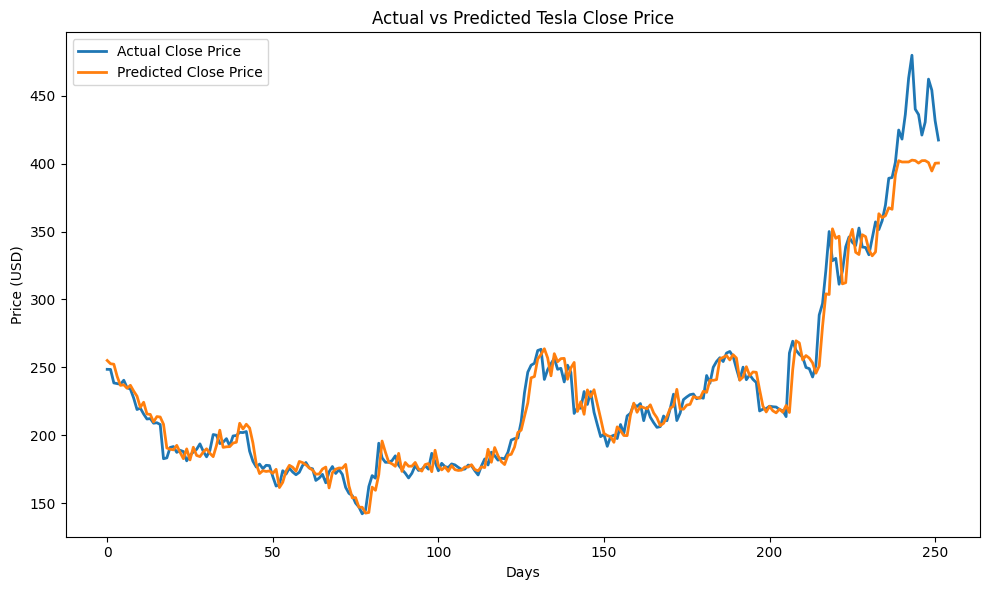

In [11]:
# Plot actual vs predicted closing prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', linewidth=2)
plt.plot(y_pred, label='Predicted Close Price', linewidth=2)
plt.title('Actual vs Predicted Tesla Close Price')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


**📏 Step 6: Evaluate the Model**

In [12]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 8.91
Root Mean Squared Error (RMSE): 14.13


**✅ Summary**

- Retrieved Tesla stock data (2020–2024) using `yfinance`
- Created a supervised learning setup to predict next-day `Close` price
- Trained a `Random Forest` regressor using `Open`, `High`, `Low`, `Volume`
- Visualized predictions and evaluated performance with **MAE = 8.91**, **RMSE = 14.13**